In [9]:
import numpy as np 
import math
import matplotlib.pyplot as plt


### Questão 1
Determinar $\int_1^7 \frac{1}{x} dx$

In [4]:
import math

def integral(func, inferior, superior, n):
    if n <= 0:
        raise ValueError("O número de subintervalos (n) deve ser um inteiro positivo.")

    h = (superior - inferior) / n 
    soma_areas = func(inferior) + func(superior)

    for i in range(1, n):
        x_i = inferior + i * h
        soma_areas += 2 * func(x_i)

    integral_aproximada = (h / 2) * soma_areas

    return integral_aproximada

In [14]:
def funcao(x):
    return (1/x)

resultado = integral(funcao, 1, 7, 1000)
print(f"A integral aproximada é igual a: {resultado:.3f}")

A integral aproximada é igual a: 1.946


### Questão 2
Compare, graficamente, o valor exato com aquele obtido no item anterior

In [18]:
limite_inferior = 1
limite_superior = 7
numero_subintervalos_calculo = 1000

resultado_integral_aproximada = integral(funcao, limite_inferior, limite_superior, numero_subintervalos_calculo)

numero_subintervalos_visualizacao = 10

x_curva = np.linspace(limite_inferior, limite_inferior + 0.5, 500)
y_curva = funcao(x_curva)

x_trapezios = np.linspace(limite_inferior, limite_superior, numero_subintervalos_visualizacao + 1)
y_trapezios = funcao(x_trapezios)

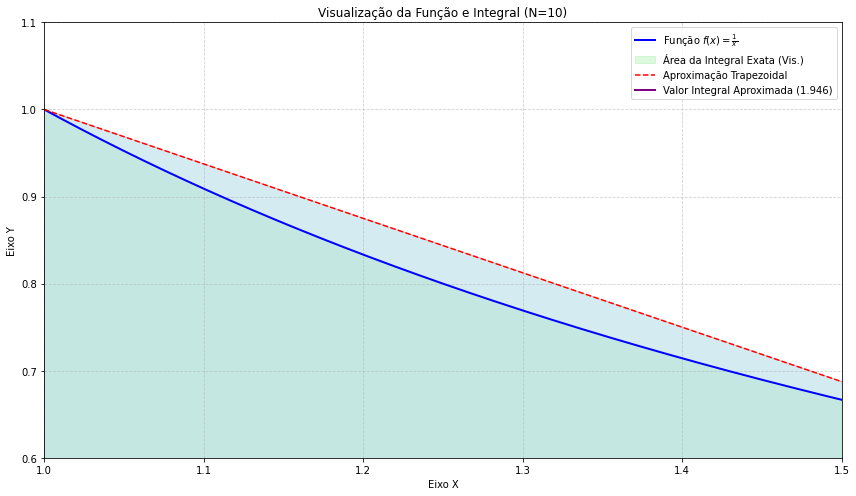

In [20]:
plt.figure(figsize=(12, 7))

plt.plot(x_curva, y_curva, color='blue', linewidth=2, label=f'Função $f(x) = \\frac{{1}}{{x}}$')

x_area_exata = np.linspace(limite_inferior, limite_inferior + 0.5, 500)
y_area_exata = funcao(x_area_exata)
plt.fill_between(x_area_exata, y_area_exata, color='lightgreen', alpha=0.3, label='Área da Integral Exata (Vis.)')

plt.plot(x_trapezios, y_trapezios, color='red', linestyle='--', linewidth=1.5, label='Aproximação Trapezoidal')

idx_start = np.searchsorted(x_trapezios, limite_inferior, side='right') - 1
idx_end = np.searchsorted(x_trapezios, limite_inferior + 0.5, side='left')

for i in range(idx_start, idx_end):
    if i < numero_subintervalos_visualizacao:
        x_segmento = [x_trapezios[i], x_trapezios[i+1], x_trapezios[i+1], x_trapezios[i]]
        y_segmento = [0, 0, y_trapezios[i+1], y_trapezios[i]]
        plt.fill(x_segmento, y_segmento, color='lightblue', alpha=0.5, edgecolor='red', linewidth=0.5)

plt.axhline(y=resultado_integral_aproximada, color='purple', linestyle='-', linewidth=2, label=f'Valor Integral Aproximada ({resultado_integral_aproximada:.3f})')

plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.title(f'Visualização da Função e Integral (N={numero_subintervalos_visualizacao})')

plt.legend()

plt.grid(True, linestyle='--', alpha=0.6)

plt.xlim(limite_inferior, limite_inferior + 0.5)
# para dar um "zoom"
min_y_zoom = funcao(limite_inferior + 0.5) * 0.9
max_y_zoom = funcao(limite_inferior) * 1.1
plt.ylim(min_y_zoom, max_y_zoom)

plt.tight_layout()

plt.savefig('visualizacao_funcao_integral_espaco_zoom.png')

### Questão 3
Desenvolva uma estratégia computacional para melhorar e avaliar os resultados obtidos.

### Questão 4
Determine $\int_{0.4}^2.0 e^x sen(10x)+8~dx$ 

In [13]:
def funcao2(x):
    return ((math.e ** x) * math.sin(10*x) + 8)

resultado2 = integral(funcao2, 0.4, 2.0, 1000)

print(f"O resultado da integral é: {resultado2:.2f}")

O resultado da integral é: 12.48
